# Introduction to Deep Learning


<img src="http://devhumor.com/content/uploads/images/February2017/tumblr_olg1aoeQHX1rgfni8o1_1280.jpg" alt="Drawing" style="width: 250px; height: 400px"/>


In [4]:
from __future__ import print_function
import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
print(torch.__version__)

1.1.0


## Задание 1.

Загрузим датасет с ценами на недвижимость в Бостоне:

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

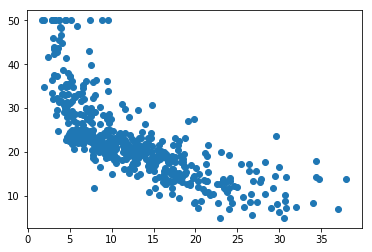

In [28]:
plt.scatter(boston.data[:, -1], boston.target)

In [29]:
from torch import nn
import torch.nn.functional as F

In [89]:
model = nn.Sequential()

# add first "dense" layer with 1 input units and 10 output unit.
model.add_module('l1', nn.Linear(1, 1))

opt = torch.optim.SGD(model.parameters(), lr=0.05)

In [90]:
# w = torch.zeros(1, requires_grad=True)
# b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32).reshape(-1, 1)
y = torch.tensor(boston.target, dtype=torch.float32).reshape(-1, 1)

In [91]:
y.shape

torch.Size([506, 1])

In [92]:
y_pred = model(x)


In [93]:
y_pred = model(x)
loss = torch.mean((y_pred - y)**2)

# propagete gradients
loss.backward()

Посмотрим на результаты в процессе обучения:

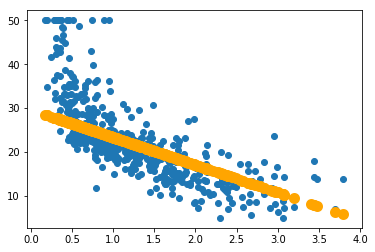

loss =  44.488792


In [94]:
from IPython.display import clear_output

for i in range(100):

#     y_pred = w * x + b
    y_pred = model(x)

    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    opt.step()           # change weights
#     w.data -= 0.05 * w.grad.data
#     b.data -= 0.05 * b.grad.data

    # zero gradients
#     w.grad.data.zero_()
#     b.grad.data.zero_()

    opt.zero_grad()      # clear gradients

    # the rest of code is just bells and whistles
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy()[:, 0], y.data.numpy()[:, 0])
        plt.scatter(x.data.numpy()[:, 0], y_pred.data.numpy()[:, 0],
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

In [112]:
model = nn.Sequential()

# add first "dense" layer with 1 input units and 10 output unit.
model.add_module('l1', nn.Linear(1, 100))
model.add_module('relu', nn.ReLU())
model.add_module('l2', nn.Linear(100, 1))

opt = torch.optim.Adam(model.parameters(), lr=0.05)

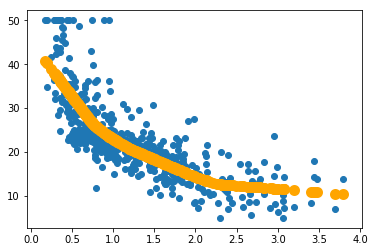

loss =  28.434755


In [113]:
from IPython.display import clear_output

for i in range(100):

#     y_pred = w * x + b
    y_pred = model(x)

    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    opt.step()           # change weights
#     w.data -= 0.05 * w.grad.data
#     b.data -= 0.05 * b.grad.data

    # zero gradients
#     w.grad.data.zero_()
#     b.grad.data.zero_()

    opt.zero_grad()      # clear gradients

    # the rest of code is just bells and whistles
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy()[:, 0], y.data.numpy()[:, 0])
        plt.scatter(x.data.numpy()[:, 0], y_pred.data.numpy()[:, 0],
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

# Задание 2

In [172]:
from mnist import load_dataset

In [173]:
train_images, train_labels, test_images, test_labels = load_dataset()

In [174]:
print("Train size = %i, test_size = %i" % (len(train_images), len(test_images)))

Train size = 60000, test_size = 10000


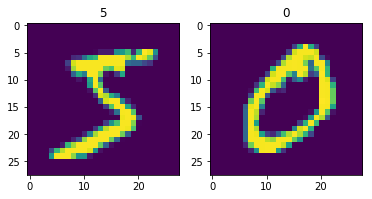

In [175]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(train_images[i].reshape([28, 28]))
    plt.title(str(train_labels[i]))

In [298]:
X_train, y_train = np.squeeze(train_images).reshape(-1, 28 * 28), train_labels
X_test, y_test = np.squeeze(test_images).reshape(-1, 28 * 28), test_labels
X_train.shape

(60000, 784)

In [411]:
# create a network `that stacks layers on top of each other
model = nn.Sequential()

# add first "dense" layer with 784 input units and 1 output unit.
model.add_module('l1', nn.Linear(784, 10))

# add softmax activation for probabilities. Normalize over axis 1
# note: layer names must be unique
model.add_module('l2', nn.LogSoftmax())

In [412]:
opt = opt = torch.optim.SGD(model.parameters(), lr=1e-3)

In [413]:
loss_function =  nn.NLLLoss()

In [414]:
history = []
num_epochs = 1

for epoch in range(num_epochs):
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, 256):
        
        # sample 256 random images
    #     ix = np.random.randint(0, len(X_train), 128)
        x_batch = torch.tensor(x_batch, dtype=torch.float32)
        y_batch = torch.tensor(y_batch, dtype=torch.int64)
        # predict probabilities
        y_predicted = model(x_batch)


        # compute loss, just like before
        loss = loss_function(y_predicted, y_batch)

        # compute gradients
        loss.backward()

        # Adam step
        opt.step()

        # here's how it's used:
        # clear gradients
        opt.zero_grad()

        history.append(loss.data.numpy())

    print("step #%i | mean loss = %.3f" % (epoch, np.mean(history[-10:])))

step #0 | mean loss = 2.086


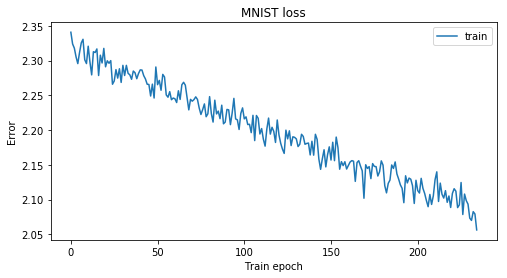

In [415]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 4))
plt.plot(history, label = 'train')
plt.title('MNIST loss')
plt.xlabel('Train epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

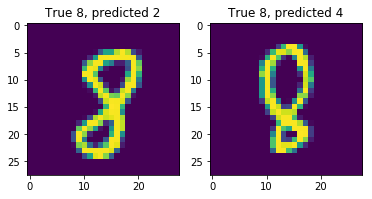

In [419]:
for i in [0, 1]:
    ix = np.random.randint(len(X_test))
    img = X_test[ix].reshape(1, -1)
    img_torch = torch.as_tensor(img, dtype=torch.float32)
    y_pred = model(img_torch).max(1)[1].data.numpy()[0]
    plt.subplot(1, 2, i + 1)
    plt.imshow(img.reshape([28, 28]))
    predicted_label = train_images[i].reshape(-1, 1)
    plt.title('True {}, predicted {}'.format(str(y_test[ix]), str(y_pred)))

In [420]:
# An auxilary function that returns mini-batches for neural network training
def iterate_minibatches(X, y, batchsize):
    indices = np.random.permutation(np.arange(len(X)))
    for start in range(0, len(indices), batchsize):
        ix = indices[start: start + batchsize]
        yield X[ix], y[ix]

In [421]:
# use your model to predict classes (0 or 1) for all test samples
# x = torch.tensor(X_test, dtype=torch.float32)
# y = torch.tensor(y_test, dtype=torch.float32)

model.train(False) # disable dropout / use averages for batch_norm
test_batch_acc = []
for X_batch, y_batch in iterate_minibatches(X_test, y_test, 500):
    logits = model(torch.as_tensor(X_batch, dtype=torch.float32))
    y_pred = logits.max(1)[1].data.numpy()
    test_batch_acc.append(np.mean(y_batch == y_pred))

test_accuracy = np.mean(test_batch_acc)
print(test_accuracy)    

print("Test accuracy: %.5f" % test_accuracy)
assert test_accuracy > 0.9, "try training longer"

0.45400000000000007
Test accuracy: 0.45400


AssertionError: try training longer